# HomeWork #5
Noam Yan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Problem 1
1a.

In [2]:
sigma = 3.9
num = int(1e6)

bg = stats.norm.rvs(loc=0, scale=sigma, size=num)
signal = stats.uniform.rvs(loc=0, scale=20, size=num)

data = bg+signal

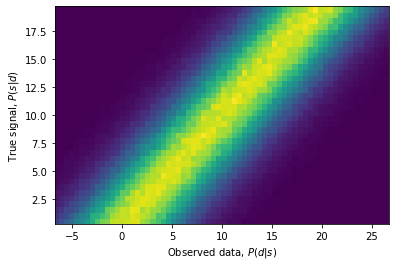

In [3]:
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, xrange, yrange= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.show()

1b. I choose the slice at y = 10.0, which gives me P(d|s), the likelyhood probability, when true signal = 10.

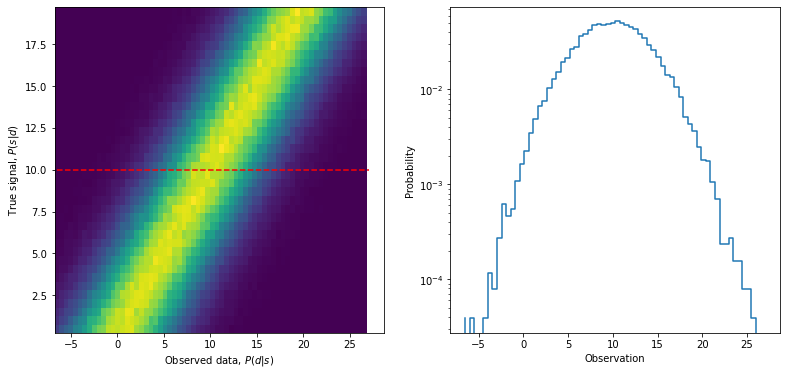

In [4]:
likelyhood = Psd[:,int(Psd.shape[1]/2)]
# Renormalize 
ratio = 1 / np.sum(likelyhood)
likelyhood = likelyhood*ratio

plt.rcParams["figure.figsize"] = (13,6)
fig,ax = plt.subplots(1,2)
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].plot(xrange[1:],np.repeat([10],len(xrange[1:])),'r--')
ax[0].set_ylabel('True signal, $P(s|d)$')
ax[0].set_xlabel('Observed data, $P(d|s)$')

ax[1].step(dataedges[1:], likelyhood)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Observation')
ax[1].set_yscale('log')
plt.show()

This plot shows the probability of getting a particular data reading given signal = 10. <br>

1c. Choosing x = 10, I get P(s|d), the posterior probability.

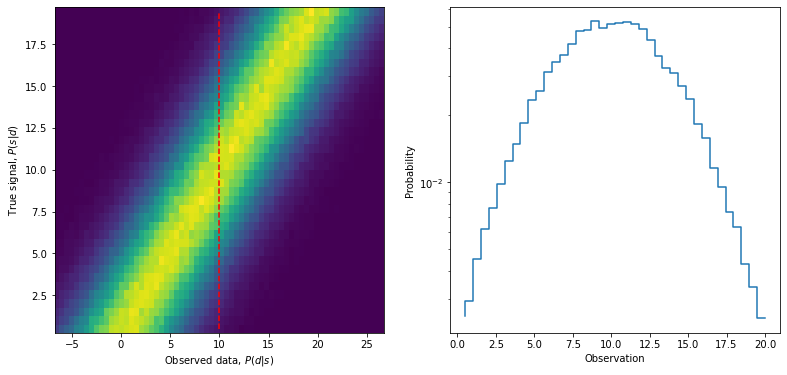

In [5]:
posterior = Psd[int(Psd.shape[0]/2),:]
# Renormalize 
ratio = 1 / np.sum(posterior)
posterior = posterior*ratio

plt.rcParams["figure.figsize"] = (13,6)
fig,ax = plt.subplots(1,2)
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].plot(np.repeat([10],len(yrange[1:-1])),yrange[1:-1],'r--')
ax[0].set_ylabel('True signal, $P(s|d)$')
ax[0].set_xlabel('Observed data, $P(d|s)$')

ax[1].step(yrange[1:], posterior)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Observation')
ax[1].set_yscale('log')
plt.show()

This plot shows the probability of seeing a signal by detecting the all the data whose intensity = 10.

# Problem 2

In [6]:
loc = sigma * 2.5

bg = stats.norm.rvs(loc=loc, scale=sigma, size=num)
signal = stats.uniform.rvs(loc=0, scale=20, size=num)

data = bg+signal

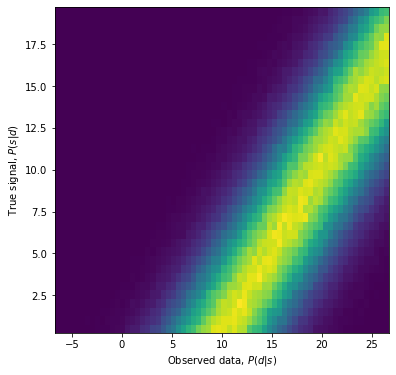

In [7]:
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, xrange, yrange= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.rcParams["figure.figsize"] = (6,6)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$')
plt.xlabel('Observed data, $P(d|s)$')
plt.show()

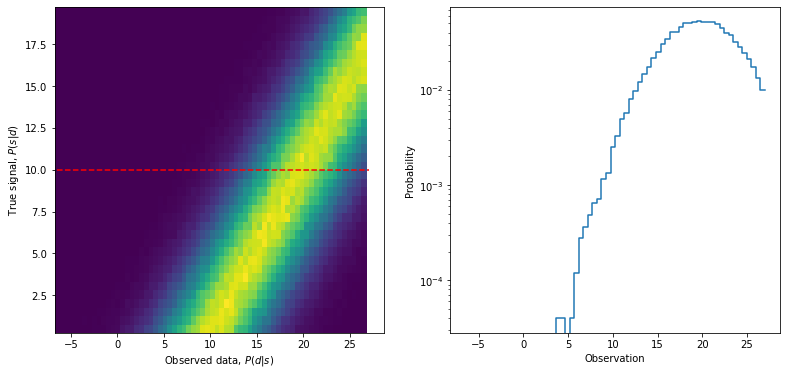

In [8]:
likelyhood = Psd[:,int(Psd.shape[1]/2)]
# Renormalize 
ratio = 1 / np.sum(likelyhood)
likelyhood = likelyhood*ratio

plt.rcParams["figure.figsize"] = (13,6)
fig,ax = plt.subplots(1,2)
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].plot(xrange[1:],np.repeat([10],len(xrange[1:])),'r--')
ax[0].set_ylabel('True signal, $P(s|d)$')
ax[0].set_xlabel('Observed data, $P(d|s)$')

ax[1].step(dataedges[1:], likelyhood)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Observation')
ax[1].set_yscale('log')
plt.show()

In this plot, the peak is at about 20, which comes from (mean + signal) = 19.75. The likelyhood probability means given a signal, what is the distribution of this data. The pristine background is a normal distribution with mean = 9.75. The plot shown above is like shifting the parabola to the right 10 units -- our signal.

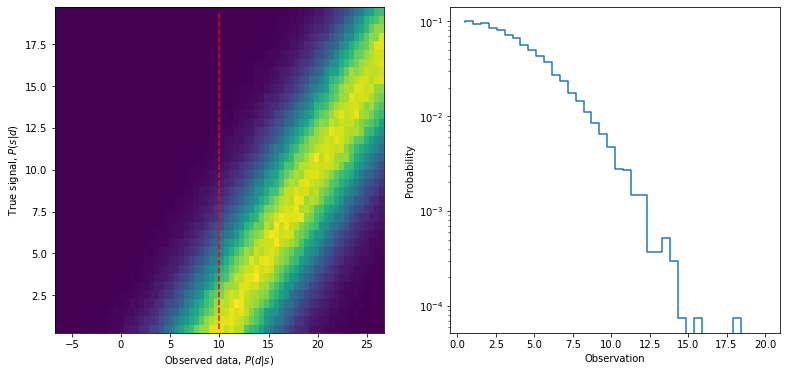

In [9]:
posterior = Psd[int(Psd.shape[0]/2),:]
# Renormalize 
ratio = 1 / np.sum(posterior)
posterior = posterior*ratio

plt.rcParams["figure.figsize"] = (13,6)
fig,ax = plt.subplots(1,2)
ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
ax[0].plot(np.repeat([10],len(yrange[1:-1])),yrange[1:-1],'r--')
ax[0].set_ylabel('True signal, $P(s|d)$')
ax[0].set_xlabel('Observed data, $P(d|s)$')

ax[1].step(yrange[1:], posterior)
ax[1].set_ylabel('Probability')
ax[1].set_xlabel('Observation')
ax[1].set_yscale('log')
plt.show()

In this peak, the peak is at about 0, which comes from (signal - mean) = 0.25. The posterior probability is like extracting data with intensity of 10 to find the probability of the value of signals. <br>
The plot tells me the signal is the most likely to be 0.25.

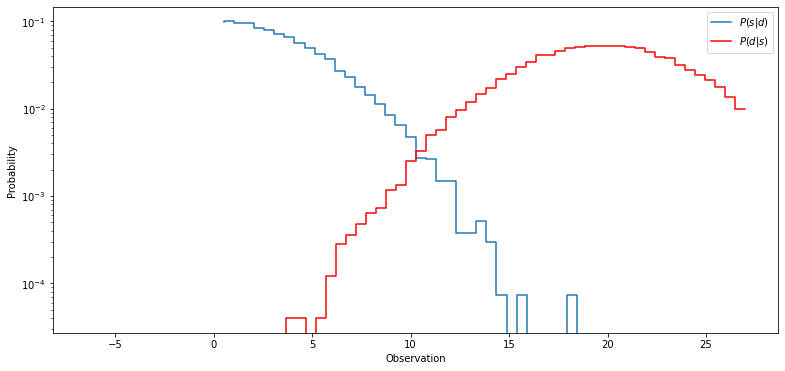

In [10]:
plt.step(yrange[1:], posterior, label='$P(s|d)$')
plt.step(dataedges[1:], likelyhood, color='r', label="$P(d|s)$")
plt.ylabel('Probability')
plt.xlabel('Observation')
plt.legend()
plt.yscale('log')

Based on the representation of the distribution of likelyhood and posterior, we should not expect them centered on the same value. Simply saying, the likelyhood is more like a addition and posterior is like subtraction. In the case of mean=0, the likelyhood and posterior yield the same value, because the value does not change when you have addition of subtraction with regard of 0. This is also why we have similar plots for likelyhood and posterior in Problem 1. 